In [3]:
import pandas as pd
import numpy as np
import pypinyin
import pymysql

In [ ]:
#读取数据
df=pd.read_csv('./taxis.csv')
df1=pd.read_csv('./taxis.csv')

In [39]:
df.head() # 查看前5行数据

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [40]:
# 了解数据维度 (形状 )
df.shape
df.shape[0]
df.shape[1]

14

In [41]:
#了解列
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [42]:
#新建一列
df['new']=1
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,new
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,1
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,1
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,1
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,1
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,1
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,1
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,1


In [43]:
#删除一列
df.drop('new', axis=1, inplace=True)
df
##删除列 法2
#del df['new']
#df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [44]:
# 缺失值  布尔值  真 假
df.isnull().sum() # sum()求和

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [45]:
df.drop_duplicates(['pickup'],inplace=True) 
# 去除pickup列有重复的记录

In [46]:
# 数据筛选  整数  小数
df[df['distance'] > 1]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
6,2019-03-26 21:07:31,2019-03-26 21:17:29,1,3.65,13.0,2.00,0.0,18.80,yellow,credit card,Battery Park City,Two Bridges/Seward Park,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427,2019-03-23 18:26:09,2019-03-23 18:49:12,1,7.07,20.0,0.00,0.0,20.00,green,cash,Parkchester,East Harlem South,Bronx,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [47]:
bins = [0, 1, max(df['distance'])]
group_name = ['近距离', '远距离']
# 数据插入  打标签
df['new_col'] = pd.cut(df['distance'], bins, labels=group_name)
#该方法不包含下界，(0,1]近距离，（1，max]远距离
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,new_col
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,远距离
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,近距离
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,远距离
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,远距离
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,远距离
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,近距离
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,远距离
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,远距离
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,远距离


In [48]:
df[df["distance"]==0]

df[df["distance"]==1]

df[df["distance"]==max(df['distance'])]


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,new_col
5364,2019-03-17 16:59:17,2019-03-17 18:04:08,2,36.7,150.0,0.0,24.02,174.82,yellow,cash,JFK Airport,JFK Airport,Queens,Queens,远距离


In [49]:
#删除列
#法1
df2=df
df.drop('new_col', axis=1, inplace=True)
#法2
#del df['new_col']
#df

In [50]:
# 数据排序
df2 = df
df2.sort_values('distance', ascending=True) #升序,没有在原表上升序
df2.sort_values('distance', ascending=True,inplace=True)  #升序,在原表上升序
#筛选
df1[df1['color'] == 'green'] 

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
5451,2019-03-24 15:05:22,2019-03-24 15:26:32,1,2.29,15.0,0.00,0.0,15.80,green,cash,Forest Hills,Corona,Queens,Queens
5452,2019-03-14 22:04:04,2019-03-14 22:10:00,1,0.80,5.5,0.00,0.0,6.80,green,credit card,Kew Gardens,Kew Gardens,Queens,Queens
5453,2019-03-29 18:12:27,2019-03-29 18:20:40,1,1.51,7.5,1.20,0.0,10.50,green,credit card,East Harlem North,East Harlem South,Manhattan,Manhattan
5454,2019-03-06 11:11:33,2019-03-06 11:15:15,1,0.45,4.5,0.00,0.0,5.30,green,cash,East Harlem North,East Harlem South,Manhattan,Manhattan
5455,2019-03-04 18:43:53,2019-03-04 18:46:50,1,0.61,4.0,0.00,0.0,5.80,green,cash,Carroll Gardens,Carroll Gardens,Brooklyn,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [51]:
# 数据-正常缺失 (填表)
# 缺失值填充
df1 = df1.fillna(axis=0, method='ffill')  #axis一定写0，向下填充

In [52]:
df1.isnull().sum() # sum()求和

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [53]:
# 数据格式
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6414 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6414 non-null   object 
 1   dropoff          6414 non-null   object 
 2   passengers       6414 non-null   int64  
 3   distance         6414 non-null   float64
 4   fare             6414 non-null   float64
 5   tip              6414 non-null   float64
 6   tolls            6414 non-null   float64
 7   total            6414 non-null   float64
 8   color            6414 non-null   object 
 9   payment          6370 non-null   object 
 10  pickup_zone      6388 non-null   object 
 11  dropoff_zone     6369 non-null   object 
 12  pickup_borough   6388 non-null   object 
 13  dropoff_borough  6369 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 751.6+ KB


In [54]:
# 字符串  -> 时间格式
df['pickup'] = pd.to_datetime(df['pickup'], format='%Y-%m-%d')
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [55]:
# 数据格式
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6414 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6414 non-null   datetime64[ns]
 1   dropoff          6414 non-null   object        
 2   passengers       6414 non-null   int64         
 3   distance         6414 non-null   float64       
 4   fare             6414 non-null   float64       
 5   tip              6414 non-null   float64       
 6   tolls            6414 non-null   float64       
 7   total            6414 non-null   float64       
 8   color            6414 non-null   object        
 9   payment          6370 non-null   object        
 10  pickup_zone      6388 non-null   object        
 11  dropoff_zone     6369 non-null   object        
 12  pickup_borough   6388 non-null   object        
 13  dropoff_borough  6369 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(

In [56]:
# 数据格式
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6433 non-null   object 
 10  pickup_zone      6433 non-null   object 
 11  dropoff_zone     6433 non-null   object 
 12  pickup_borough   6433 non-null   object 
 13  dropoff_borough  6433 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [57]:
df1['合并列'] = df1['pickup'] +"~" +df1['dropoff'] #两列合并


In [58]:
df1

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,合并列
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23 20:21:09~2019-03-23 20:27:24
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04 16:11:55~2019-03-04 16:19:00
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27 17:53:01~2019-03-27 18:00:25
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10 01:23:59~2019-03-10 01:49:51
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30 13:27:42~2019-03-30 13:37:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,2019-03-31 09:51:53~2019-03-31 09:55:27
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,2019-03-31 17:38:00~2019-03-31 18:34:23
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,2019-03-23 22:55:18~2019-03-23 23:14:25
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,2019-03-04 10:09:25~2019-03-04 10:14:29


In [59]:
#分割
df33=df1['合并列'].str.split('~', expand=True) #expand=True 什么意思:就会分裂成两列，如果为False就还是1列，以一个列表包含分裂出来的元素进行保存。
df33 #是一个新的dataframe不会再原表上进行分列
#怎么在原表上直接分列？目前知道的方法如下：
#法1
df["开始时间"]=df33[0]
df["结束时间"]=df33[1]
df
#法2
df1['开始时间'] =df33.iloc[:,0]  #跟上面的别只是取列的方式不同
df1['结束时间'] =df33.iloc[:,1]
df1

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,合并列,开始时间,结束时间
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23 20:21:09~2019-03-23 20:27:24,2019-03-23 20:21:09,2019-03-23 20:27:24
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04 16:11:55~2019-03-04 16:19:00,2019-03-04 16:11:55,2019-03-04 16:19:00
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27 17:53:01~2019-03-27 18:00:25,2019-03-27 17:53:01,2019-03-27 18:00:25
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10 01:23:59~2019-03-10 01:49:51,2019-03-10 01:23:59,2019-03-10 01:49:51
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30 13:27:42~2019-03-30 13:37:14,2019-03-30 13:27:42,2019-03-30 13:37:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,2019-03-31 09:51:53~2019-03-31 09:55:27,2019-03-31 09:51:53,2019-03-31 09:55:27
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,2019-03-31 17:38:00~2019-03-31 18:34:23,2019-03-31 17:38:00,2019-03-31 18:34:23
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,2019-03-23 22:55:18~2019-03-23 23:14:25,2019-03-23 22:55:18,2019-03-23 23:14:25
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,2019-03-04 10:09:25~2019-03-04 10:14:29,2019-03-04 10:09:25,2019-03-04 10:14:29


In [60]:
# 数据透视表
#pd.pivot_table(df1, index=[]左边的,columns=[]上边列 ,values=[],aggfunc=[np.sum,np.mean,len])
pd.pivot_table(df1, index=['pickup_zone', 'payment'], values=['total'],aggfunc=[np.sum,np.mean,len]) #求和，平均，计数

sum       mean   len
                                       total      total total
pickup_zone             payment                              
Allerton/Pelham Gardens credit card    71.72  35.860000     2
Alphabet City           cash           19.60   9.800000     2
                        credit card   141.52  20.217143     7
Astoria                 cash          405.65   9.219318    44
                        credit card   230.84  10.992381    21
...                                      ...        ...   ...
World Trade Center      credit card   452.03  26.590000    17
Yorkville East          cash          136.80  12.436364    11
                        credit card   980.56  16.074754    61
Yorkville West          cash          245.20  12.905263    19
                        credit card  1286.89  15.320119    84

[318 rows x 3 columns]

In [61]:
df1['total'].describe()  # 了解一下 统计分析指标

count    6433.000000
mean       18.517794
std        13.815570
min         1.300000
25%        10.800000
50%        14.160000
75%        20.300000
max       174.820000
Name: total, dtype: float64

<AxesSubplot:>

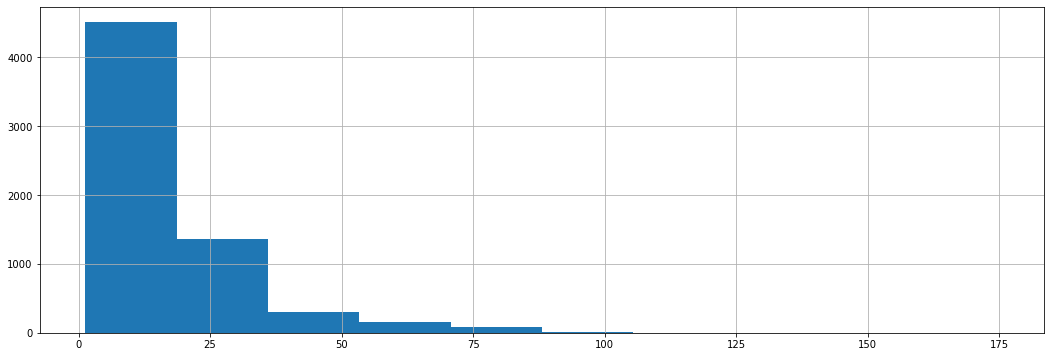

In [62]:
df1['total'].hist(figsize=(18, 6)) #直方图

<AxesSubplot:>

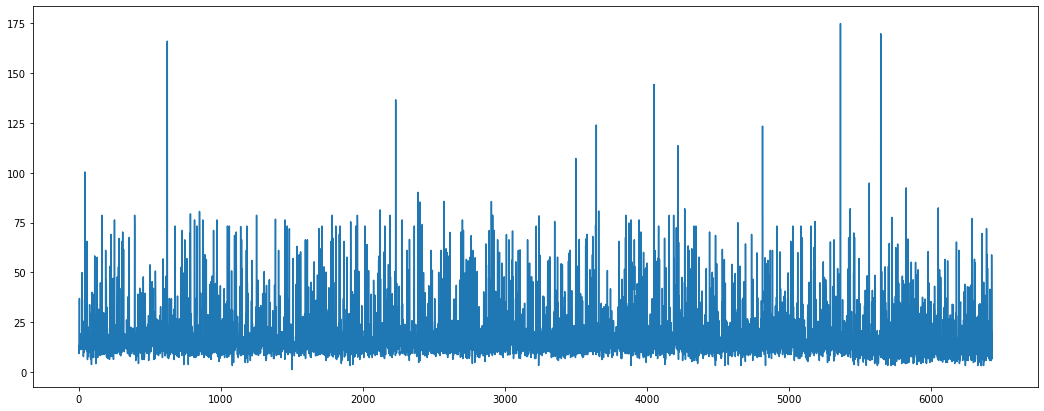

In [63]:
df1['total'].plot(figsize=(18, 7))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

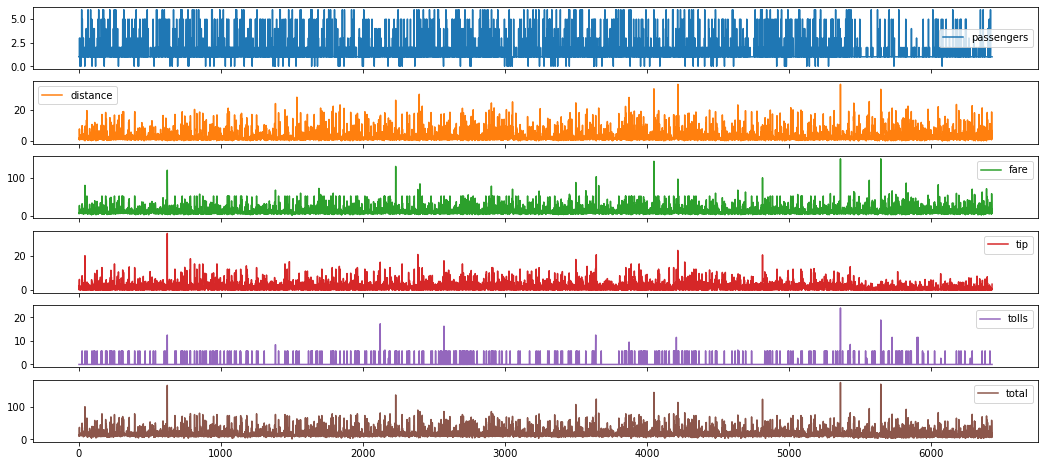

In [64]:
df1.plot.line(subplots=True, figsize=(18, 8)) # subplots 子图

In [65]:
import matplotlib.pyplot as plt

In [66]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 字体设置


In [67]:
# 绘图
# 数据透视表
toushi=pd.pivot_table(df1, index=['color'], values=['total'],aggfunc=[np.sum]) #求和，平均，计数
toushi.index

Index(['green', 'yellow'], dtype='object', name='color')

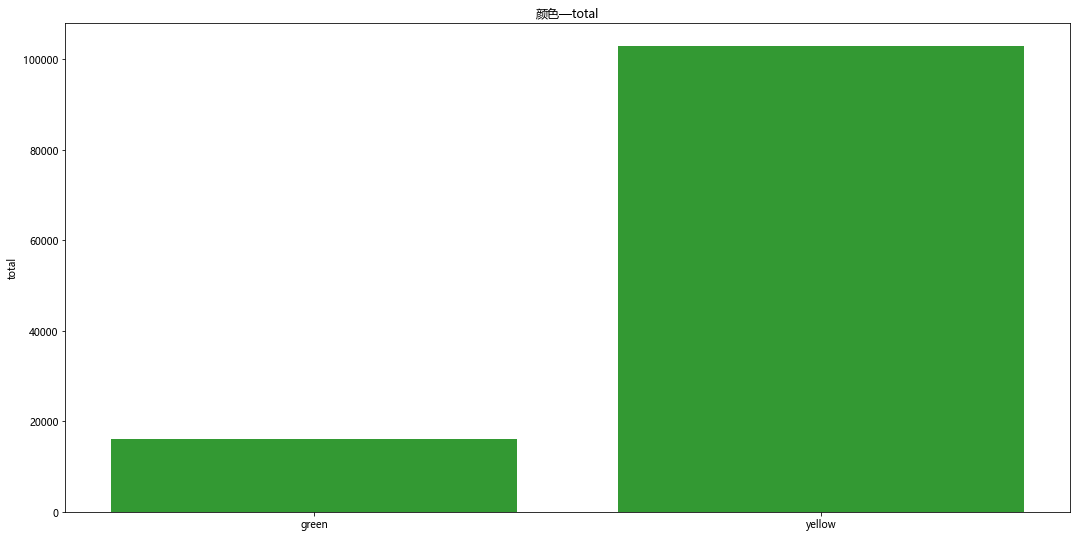

In [68]:
plt.figure(figsize=(18, 9))
plt.bar(toushi.index, list(toushi.iloc[:,0]), align='center', color='green', alpha=0.8)
plt.ylabel('total')
plt.title('颜色—total')
#plt.xticks(range(4), ['长沙市', '北京市', '上海市', '重庆市'])
plt.show()

In [69]:

#############################################################################################
#分割线


In [70]:
#精选23个Pandas常用函数
import pandas as pd
import numpy as np

In [71]:
#（1）assign函数
df = pd.DataFrame({
    'temp_c': [17.0, 25.0]},
    index=['Portland', 'Berkeley'])
df

,temp_c
Portland,17.0
Berkeley,25.0


In [72]:
# 生成新的字段
df.assign(temp_f=df['temp_c'] * 9 / 5 + 32)


,temp_c,temp_f
Portland,17.0,62.6
Berkeley,25.0,77.0


In [73]:
df  # 原来DataFrame是不改变的

,temp_c
Portland,17.0
Berkeley,25.0


In [74]:
#如果是通过下面的方式来生成新的字段，那么原来的数据则会改变
df["temp_f1"] = df["temp_c"] * 9 / 5 + 32
df

,temp_c,temp_f1
Portland,17.0,62.6
Berkeley,25.0,77.0


In [75]:
#（2）bool函数

In [76]:
#（3）concat函数:该函数是用来表示多个DataFrame的拼接，横向或者纵向皆可。
df1 = pd.DataFrame({
    "sid":["s1","s2"],
    "name":["xiaoming","Mike"]})
df1

,sid,name
0,s1,xiaoming
1,s2,Mike


In [77]:
df2 = pd.DataFrame({
    "sid":["s3","s4"],
    "name":["Tom","Peter"]})
df2

,sid,name
0,s3,Tom
1,s4,Peter


In [78]:
df3 = pd.DataFrame({
    "address":["北京","深圳"],             
    "sex":["Male","Female"]})
df3

,address,sex
0,北京,Male
1,深圳,Female


In [79]:
# 使用1：纵向
pd.concat([df1,df2])  #索引没有接着标,默认axis=0

,sid,name
0,s1,xiaoming
1,s2,Mike
0,s3,Tom
1,s4,Peter


In [80]:
# 使用2：横向
pd.concat([df1,df3],axis=1) #默认axis=1，横向拼接，表与表之间没有关联变量，直接拼接的

,sid,name,address,sex
0,s1,xiaoming,北京,Male
1,s2,Mike,深圳,Female


In [81]:
#（4）dropna函数：删除空值：可以对整个DataFrame删除，也可以指定某个属性来删除

In [82]:
df4 = pd.DataFrame({
    "sid":["s1","s2", np.nan],             
    "name":["xiaoming",np.nan, "Mike"]})
df4

,sid,name
0,s1,xiaoming
1,s2,NaN
2,NaN,Mike


In [83]:
df4.dropna() #会把含有空值的记录都删除,df4没有变动的

,sid,name
0,s1,xiaoming


In [84]:
df4  #df4没有变动的

,sid,name
0,s1,xiaoming
1,s2,NaN
2,NaN,Mike


In [85]:
df4.dropna(subset=["name"]) #指定某个属性来删除含有空值的记录,df4原表没有变动的

,sid,name
0,s1,xiaoming
2,NaN,Mike


In [86]:
#（5）explode函数：爆炸函数的使用：将宽表转成长表。爆炸之后原数据是没有改变的

In [3]:
df5 = pd.DataFrame({
    "sid":["s1","s2"],       
    "phones":[["华为","小米","一加"],["三星","苹果"]]
                   })
df5

,sid,phones
0,s1,"[华为, 小米, 一加]"
1,s2,"[三星, 苹果]"


In [4]:
df5.explode("phones") #记录散开

,sid,phones
0,s1,华为
0,s1,小米
0,s1,一加
1,s2,三星
1,s2,苹果


In [89]:
df5 #原表不会改变

,sid,phones
0,s1,"[华为, 小米, 一加]"
1,s2,"[三星, 苹果]"


In [90]:
#（6）fillna函数：填充缺失值；可以整体填充，也可以对每个属性单独填充

In [91]:
df4

,sid,name
0,s1,xiaoming
1,s2,NaN
2,NaN,Mike


In [92]:
df4.fillna({"sid":"s3","name":"Peter"}) #将属性sid中缺失值全部填为s3,name缺失的地方填为Peter

,sid,name
0,s1,xiaoming
1,s2,Peter
2,s3,Mike


In [93]:
df4 #原表不变

,sid,name
0,s1,xiaoming
1,s2,NaN
2,NaN,Mike


In [94]:
#（7）groupby函数：同组统计的功能

In [5]:
# 借用这个结果
df6 = df5.explode("phones") #数据爆炸，即散开成记录的形式
df6

,sid,phones
0,s1,华为
0,s1,小米
0,s1,一加
1,s2,三星
1,s2,苹果


In [36]:
group =df6.groupby("sid")["phones"].count() #汇总s1和s2的记录数
#法二： df6.groupby("sid").count()["phones"] #汇总s1和s2的记录数


sid
s1    3
s2    2
Name: phones, dtype: int64

In [11]:
#可以直接取数
group["s1"]

3

In [97]:
df6.groupby("sid").count()  #比较两个结果的差距

,phones
sid,
s1,3
s2,2


In [99]:
df6.groupby("sid",as_index=False).count()  #不把groupby列作为索引
#等价于
ss=df6.groupby("sid").count()
ss.reset_index()

#df6.groupby("sid").agg(['A':np.count,'B':np.top])  #不同列实现不同的聚合
#单独获得某个分组，其实类似于筛选数据：
#例如：g=df.groupby('A')  获得列A的值为bar的分组：g.get_group('bar')
#等价于：df[df['A']=='bar']

,sid,phones
0,s1,3
1,s2,2


In [12]:
df6.groupby("sid").agg([np.count,np.top,np.std])  #查看多个聚合函数

In [73]:
pd.concat([df6,df6]) #try

,sid,phones
0,s1,华为
0,s1,小米
0,s1,一加
1,s2,三星
1,s2,苹果
0,s1,华为
0,s1,小米
0,s1,一加
1,s2,三星
1,s2,苹果


In [74]:
pd.concat([df6,df6]).groupby("sid")["phones"].count()  #try

sid
s1    6
s2    4
Name: phones, dtype: int64

In [39]:
dff = pd.DataFrame({
    'key': ['K0', 'K1', 'K2'],
    'B': ['B0', 'B1', 'B2'],
    'C': [22,33,44]})
area=dff.groupby(["key"])["C"].sum()
area.reset_index() #将索引变成列
area1=dff.groupby(["key","B"])["C"].sum()
area1.reset_index(level=[0,1]) #将多层索引变成列，level=[0,1]不写也没关系

# dff.groupby(["key","B"]).size() 
# size()函数对每个分组进行计数


key  B 
K0   B0    1
K1   B1    1
K2   B2    1
dtype: int64

In [75]:
#（8）head函数：查看前几行的数据，默认是前5行

In [104]:
df7 = pd.DataFrame({
    "sid":list(range(10)),                
    "name":list(range(80,100,2))})
df7  #range(10)从0到9，range(80,100,2)从80到99，步长2

,sid,name
0,0,80
1,1,82
2,2,84
3,3,86
4,4,88
5,5,90
6,6,92
7,7,94
8,8,96
9,9,98


In [77]:
df7.head()   # 默认前5行

,sid,name
0,0,80
1,1,82
2,2,84
3,3,86
4,4,88


In [78]:
df7.head(3)  # 指定前3行

,sid,name
0,0,80
1,1,82
2,2,84


In [79]:
#（9）isnull函数：判断是否存在缺失值，超级常用的函数

In [80]:
df4

,sid,name
0,s1,xiaoming
1,s2,NaN
2,NaN,Mike


In [81]:
df4.isnull()  # True表示缺失

,sid,name
0,False,False
1,False,True
2,True,False


In [82]:
df4.isnull().sum()  # 每个字段缺失的总和

sid     1
name    1
dtype: int64

In [83]:
df6

,sid,phones
0,s1,华为
0,s1,小米
0,s1,一加
1,s2,三星
1,s2,苹果


In [84]:
df6.isnull().sum()   # 没有缺失值

sid       0
phones    0
dtype: int64

In [85]:
#（10）join函数:用于连接不同的DataFrame：需要区分concat、join、append三个函数注意总结

In [86]:
df7 = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
    'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
df7

,key,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4
5,K5,A5


In [87]:
df8 = pd.DataFrame({
    'key': ['K0', 'K1', 'K2'],
    'B': ['B0', 'B1', 'B2']})
df8

,key,B
0,K0,B0
1,K1,B1
2,K2,B2


In [88]:
df7.join(df8,lsuffix="_df7",rsuffix="_df8")   #df7里面加入df8,lsuffix:【string】左DataFrame中重复列的后缀,rsuffix:【string】右DataFrame中重复列的后缀

,key_df7,A,key_df8,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,NaN,NaN
4,K4,A4,NaN,NaN
5,K5,A5,NaN,NaN


In [89]:
#（11）sort_values 排序

In [90]:
df8

,key,B
0,K0,B0
1,K1,B1
2,K2,B2


In [91]:
df8.sort_values("key",ascending=False)

,key,B
2,K2,B2
1,K1,B1
0,K0,B0


In [92]:
df8

,key,B
0,K0,B0
1,K1,B1
2,K2,B2


In [93]:
df_8=df8.sort_values("key",ascending=False) #排序不改变原表，需要新建一个表
#法2直接在原表上排序
#df8.sort_values("key",ascending=False,inplace=True)

In [94]:
df_8 #排序后不会改变索引，如何重建索引

,key,B
2,K2,B2
1,K1,B1
0,K0,B0


In [95]:
df_8=df8.sort_values("key",ascending=False,ignore_index=True) #排序不改变原表，需要新建一个表，重建索引（索引也排序）
df_8

,key,B
0,K2,B2
1,K1,B1
2,K0,B0


In [96]:
#多个关键字段排序
df6

,sid,phones
0,s1,华为
0,s1,小米
0,s1,一加
1,s2,三星
1,s2,苹果


In [97]:
df6.sort_values(by=['sid','phones'],ascending=True,ignore_index=True)  #多个关键字段排序,phones是按什么排序的?（pandas默认的排序，不支持中文拼音排序，如果使用中文拼音排序需要自定义），索引重排

,sid,phones
0,s1,一加
1,s1,华为
2,s1,小米
3,s2,三星
4,s2,苹果


In [98]:
df6.sort_values(by=['sid','phones'],ascending=[True,False],ignore_index=True) # 先根据sid升序，如果sid相同，再根据phones降序

,sid,phones
0,s1,小米
1,s1,华为
2,s1,一加
3,s2,苹果
4,s2,三星


In [99]:
df4

,sid,name
0,s1,xiaoming
1,s2,NaN
2,NaN,Mike


In [100]:
df4.sort_values('sid',ascending=True,na_position='first') #缺失值放首位，缺失值放尾位   na_position=‘last’

,sid,name
2,NaN,Mike
0,s1,xiaoming
1,s2,NaN


In [101]:
#（12）kurt函数:查找数据的峰度值

In [102]:
df9 = pd.DataFrame({
    "A":[12, 4, 5, 44, 1], 
    "B":[5, 2, 54, 3, 2], 
    "C":[20, 16, 7, 3, 8], 
    "D":[14, 3, 17, 2, 6]}) 
df9

,A,B,C,D
0,12,5,20,14
1,4,2,16,3
2,5,54,7,17
3,44,3,3,2
4,1,2,8,6


In [103]:
df9.kurt()  #正态分布的峰度为3。以一般而言，正态分布为参照，峰度可以描述分布形态的陡缓程度，若bk<3，则称分布具有不足的峰度，若bk>3，则称分布具有过度的峰度。偏度：表示相对于平均值不对称程度的特征数，长为在哪边则为哪偏，长尾在左即为左偏


A    3.936824
B    4.941512
C   -1.745717
D   -2.508808
dtype: float64

In [104]:
#（13）loc函数：loc就是location的缩写，定位查找数据

In [105]:
df9

,A,B,C,D
0,12,5,20,14
1,4,2,16,3
2,5,54,7,17
3,44,3,3,2
4,1,2,8,6


In [106]:
df9.loc[1,:]  # 行标签名为“1”的行，所有列

A     4
B     2
C    16
D     3
Name: 1, dtype: int64

In [107]:
df9.iloc[1,:]  # 第二行，所有列

A     4
B     2
C    16
D     3
Name: 1, dtype: int64

In [108]:
df9.loc[1:3,"B"]  # 行标签名为“1”“2”“3”的行（是包含3的），列名为“B”

1     2
2    54
3     3
Name: B, dtype: int64

In [109]:
df9.iloc[1:3,1]  # 第2行和第三行，第2列

1     2
2    54
Name: B, dtype: int64

In [110]:
#loc函数和iloc函数
#loc函数：通过行标签名来取行数据（如取"Index"为"A"的行或者"Index"为"0"）
#iloc函数：通过“索引号”来取行数据

In [111]:
#（14）merge函数同样也是数据的合并函数，数据库风格的合并，类似SQL中的join，功能最为强大

In [112]:
df7

,key,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4
5,K5,A5


In [113]:
df8

,key,B
0,K0,B0
1,K1,B1
2,K2,B2


In [114]:
pd.merge(df7,df8,how='inner')  # 默认how的参数是inner，内连接，取交集

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2


In [115]:
pd.merge(df7,df8,how="outer")  #外连接，连接后取全集

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,NaN
4,K4,A4,NaN
5,K5,A5,NaN


In [116]:
pd.merge(df7,df8,how="left")  #左连接

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,NaN
4,K4,A4,NaN
5,K5,A5,NaN


In [117]:
pd.merge(df7,df8,how="right")  #右连接

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2


In [118]:
##总结：concat,join,merge,append

In [119]:
#concat(轴向连接)函数结构pd.concat(objs, axis=0或者1, join=’outer’, join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)
    #注意：纵向拼接时（axis=0）,若两个要拼接的df字段名不一致，不用担心，concat会自动对齐字段进行拼接
    #注意：若是纵向拼接，并且字段名不完全一致，如果使用join='inner'，只会保留共同拥有的字段
    #是索引对齐连接，即按索引连接
    #objs：连接对象，多以列表、字典传入
    #axis：轴向，0代表纵向连接，1，代表横向连接
    #join：连接方式，共有'inner','left','right','outer'
    #join_axes:参与连接的索引，【新版已经没有了】
    #ignore_index：是否忽略索引，True表示按照索引连接后，重新创建索引0,1,2.。。
    #keys：层次化索引
    #相比于join和merge独特的地方：（1）是轴向连接（2）不仅可以拼接数据块DataFrame，也可以拼接序列Series(3)axis=1就可以进行类似于join和merge的表格连接，默认是按索引外连接
    #concat中要与join和merge分别开来最重要的参数就是ignore_index，因为这个合并和index(索引)的关系密切。

In [120]:
#join函数结构df1.join(df2, on=None, how="left"或者“right”或者“inner”或者“outer”, lsuffix=”, rsuffix=”, sort=False)
    #备注1：on参数不写，默认是依据两个表的索引进行连接；how不写默认左连接，如果表1，2有相同的列，lsuffix和rsuffix一定要写，不会像merge会自动添加，不写连接就会报错
    #备注2：通过指定的列连接，需要将指定列设为索引，两个表都要设置，然后进行连接，例如：caller.set_index('key').join(other.set_index('key'))
    #备注3：caller的关键列默认为index，可以使用参数on指定别的列为关键列，但是other的关键列永远都是index，所有使用别的列为关键列是，常常使用set_index()。例如：caller.join(other.set_index('key'), on='key') #用左表的key和右表的索引连接
    #备注4：相比于merge独特的地方：（1）默认用索引连接和左连接（2）合并多个DataFrame对象，也可以是series和DataFrame的混合对象，例如：df1.join([df3,df4,s1],how='left'或‘right’或‘outer’)   

In [121]:
#merge函数结构pd.merge(表1，表2，on='连接字段'，how="left"或者“right”或者“inner”或者“outer”，suffixes=('_1','_2')) 
    #备注1：on参数不写，默认是选相同字段名连接，how不写默认内连接，suffixes不写默认相同列名后缀名是‘_x’和‘_y’（连接的字段若同名，会自动保留一个）,根据多个键进行连接修改on=['字段1','字段2']
    #备注2：字段连接，但名称不一样。当两个表连接列的列名不一致时，把“on=”改成left_on="连接字段名1"，right_on="连接字段名2"
    #备注3：字段名和索引连接。例如，当左表的链接字段在“key”，右表连接字段在其索引上，把“on=”改成left_on="key",right_index=True
    #备注4：索引和索引连接。例如，当左表的链接字段在其索引上，右表连接字段在其索引上，把“on=”改成left_index=True,right_index=True
    #备注5：多键进项连接，例如，把“on=”改成on=["职称"，“姓名”]，通俗的解释：职称和姓名连接作为一个新辅助列，两个表的辅助列相同才能够匹配上
    #备注6：如果不是合并多个表，join的功能merge都可以实现
    #备注7：可以合并多个DataFrame对象吗？？？

In [122]:
#append()函数形式df1.append(df2),df1.append(df2,ignore_index=True)
#append是concat的简略形式,只不过只能在axis=0上进行合并
#添加参数ignore_index=True，重建索引

In [123]:
#join例子

In [124]:
caller = pd.DataFrame({'key':['K0', 'K1', 'K2', 'K3', 'K4', 'K5'], 'A':['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
caller

,key,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4
5,K5,A5


In [125]:
other = pd.DataFrame({'key':['K0', 'K1', 'K2','K99'], 'B':['B0', 'B1', 'B2', 'B99']})
other

,key,B
0,K0,B0
1,K1,B1
2,K2,B2
3,K99,B99


In [126]:
#on不写按照索引连接
caller.join(other, lsuffix='_caller', rsuffix='_other')  #lsuffix和rsuffix一定要写，不然就会报错

,key_caller,A,key_other,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,K99,B99
4,K4,A4,NaN,NaN
5,K5,A5,NaN,NaN


In [127]:
#join通过指定的列连接DataFrame
#先把该列设置为索引，然后再连接，需要同时设定caller和other的索引，连接结果的索引也是指定的列
caller.set_index('key').join(other.set_index('key'))

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2
K3,A3,NaN
K4,A4,NaN
K5,A5,NaN


In [128]:
#caller的关键列默认为index，可以使用参数on指定别的列为关键列，但是other的关键列永远都是index，所有使用别的列为关键列是，常常使用set_index()
caller.join(other.set_index('key'), on='key') #用左表的key和右表的索引连接

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,NaN
4,K4,A4,NaN
5,K5,A5,NaN


In [129]:
s1=pd.Series([1,2],index=list('ab'))
s2=pd.Series([3,4,5],index=list('bde'))

In [130]:
pd.concat([s1,s2])

a    1
b    2
b    3
d    4
e    5
dtype: int64

In [131]:
#（15）nunique函数：用于统计数据的唯一值的数量

In [132]:
df10 = pd.DataFrame({
    "sid":list("acbdefg"),
    "score":[9,8,9,7,8,9,3]
                    })
df10

,sid,score
0,a,9
1,c,8
2,b,9
3,d,7
4,e,8
5,f,9
6,g,3


In [133]:
df10.nunique()

sid      7
score    4
dtype: int64

In [134]:
df10.nunique()[1]  #取数

4

In [135]:
#（16）unique函数：用于查找数据的唯一值

In [136]:
df10

,sid,score
0,a,9
1,c,8
2,b,9
3,d,7
4,e,8
5,f,9
6,g,3


In [137]:
df10["score"].unique()

array([9, 8, 7, 3], dtype=int64)

In [138]:
df10["sid"].unique()

array(['a', 'c', 'b', 'd', 'e', 'f', 'g'], dtype=object)

In [139]:
#（17）value_counts函数：用于统计字段中每个唯一值的个数，结合了unique和nunique的结果

In [140]:
df6

,sid,phones
0,s1,华为
0,s1,小米
0,s1,一加
1,s2,三星
1,s2,苹果


In [141]:
df6["sid"].value_counts()

s1    3
s2    2
Name: sid, dtype: int64

In [142]:
df6["phones"].value_counts()

华为    1
小米    1
一加    1
三星    1
苹果    1
Name: phones, dtype: int64

In [143]:
#（18）pct_change函数：计算当前时期和前一个时期的比值

In [144]:
s = pd.Series([90, 91, 85])
s

0    90
1    91
2    85
dtype: int64

In [145]:
s.pct_change()  #计算比前一个数值增大了或减少了多少百分比

0         NaN
1    0.011111
2   -0.065934
dtype: float64

In [146]:
(91 - 90) / 90

0.011111111111111112

In [147]:
(85 - 91) / 91

-0.06593406593406594

In [148]:
# 和前两个时期相比
s.pct_change(periods=2) 

0         NaN
1         NaN
2   -0.055556
dtype: float64

In [149]:
# 如果存在空值，用填充方法
s = pd.Series([90, 91, None, 85])
s 

0    90.0
1    91.0
2     NaN
3    85.0
dtype: float64

In [150]:
s.pct_change(fill_method='ffill')  #向下填充（填充值和上面那个值相同）或者向前填充；fill_method='bfill' 向后填充，或是向上填充

0         NaN
1    0.011111
2    0.000000
3   -0.065934
dtype: float64

In [151]:
#（19）query函数：根据条件查询取值

In [152]:
df10

,sid,score
0,a,9
1,c,8
2,b,9
3,d,7
4,e,8
5,f,9
6,g,3


In [153]:
df10.query("score >= 8") 

,sid,score
0,a,9
1,c,8
2,b,9
4,e,8
5,f,9


In [154]:
#等价于
df10[df10['score']>= 8]

,sid,score
0,a,9
1,c,8
2,b,9
4,e,8
5,f,9


In [155]:
df10.query("score >= 8 and sid=='a'")   #支持多条件，条件都卸载双引号里面

,sid,score
0,a,9


In [156]:
#(20)where函数:用于查找Series或者DataFrame中满足某个条件的数据

In [157]:
w = pd.Series(range(7))
w

0    0
1    1
2    2
3    3
4    4
5    5
6    6
dtype: int64

In [158]:
# 满足条件的显示；不满足的用空值代替
w.where(w>3)

0    NaN
1    NaN
2    NaN
3    NaN
4    4.0
5    5.0
6    6.0
dtype: float64

In [159]:
# 不满足条件的用8代替
w.where(w > 3, 8)

0    8
1    8
2    8
3    8
4    4
5    5
6    6
dtype: int64

In [160]:
w

0    0
1    1
2    2
3    3
4    4
5    5
6    6
dtype: int64

In [161]:
df10

,sid,score
0,a,9
1,c,8
2,b,9
3,d,7
4,e,8
5,f,9
6,g,3


In [185]:
#思考：怎么把score大于等于9的备注为“优秀”
#一.if函数法(不行)
#if df10['score']>=9:
#    df10['成绩等级']="优秀"
#elif df10['score']>=8:
#    df10['成绩等级']="良好"
#elif df10['score']>=6:
#    df10['成绩等级']="合格"
#else:
#    df10['成绩等级']="不合格"


In [163]:
#二
df10['成绩等级']='不合格'
df10['成绩等级'][(df10['score']>=6) & (df10['score']<8)]='合格'
df10['成绩等级'][(df10['score']>=8) & (df10['score']<9)]='良好'
df10['成绩等级'][df10['score']>=9]='优秀'
df10

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_10512/2936247950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['成绩等级'][(df10['score']>=6) & (df10['score']<8)]='合格'
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_10512/2936247950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['成绩等级'][(df10['score']>=8) & (df10['score']<9)]='良好'
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_10512/2936247950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

,sid,score,成绩等级
0,a,9,优秀
1,c,8,良好
2,b,9,优秀
3,d,7,合格
4,e,8,良好
5,f,9,优秀
6,g,3,不合格


In [ ]:
#三

In [164]:
#（21）rank函数：进行排名的函数，类似SQL的窗口函数功能

In [165]:
df10

,sid,score,成绩等级
0,a,9,优秀
1,c,8,良好
2,b,9,优秀
3,d,7,合格
4,e,8,良好
5,f,9,优秀
6,g,3,不合格


In [166]:
df10["rank_10"] = df10["score"].rank()  #定义一个新列，用它表示score的排在第几名，同一名次用的是同一名次的平均值
df10

,sid,score,成绩等级,rank_10
0,a,9,优秀,6.0
1,c,8,良好,3.5
2,b,9,优秀,6.0
3,d,7,合格,2.0
4,e,8,良好,3.5
5,f,9,优秀,6.0
6,g,3,不合格,1.0


In [167]:
df10["rank_10_max"] = df10["score"].rank(method="max") #定义一个新列，用它表示score的排在第几名，同一名次用的是同一名次的最大值
df10

,sid,score,成绩等级,rank_10,rank_10_max
0,a,9,优秀,6.0,7.0
1,c,8,良好,3.5,4.0
2,b,9,优秀,6.0,7.0
3,d,7,合格,2.0,2.0
4,e,8,良好,3.5,4.0
5,f,9,优秀,6.0,7.0
6,g,3,不合格,1.0,1.0


In [168]:
#method='min'更符合日常使用的方式
df10["rank_10_min"] = df10["score"].rank(method="min")#定义一个新列，用它表示score的排在第几名，同一名次用的是同一名次的最大值
df10  

,sid,score,成绩等级,rank_10,rank_10_max,rank_10_min
0,a,9,优秀,6.0,7.0,5.0
1,c,8,良好,3.5,4.0,3.0
2,b,9,优秀,6.0,7.0,5.0
3,d,7,合格,2.0,2.0,2.0
4,e,8,良好,3.5,4.0,3.0
5,f,9,优秀,6.0,7.0,5.0
6,g,3,不合格,1.0,1.0,1.0


In [169]:
#（22）tail函数：查看末尾的数据,和head相对，一个查尾，一个查头

In [170]:
df7

,key,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4
5,K5,A5


In [171]:
df7.tail()

,key,A
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4
5,K5,A5


In [172]:
#（23）unique函数：查找每个字段的唯一元素

In [173]:
df10

,sid,score,成绩等级,rank_10,rank_10_max,rank_10_min
0,a,9,优秀,6.0,7.0,5.0
1,c,8,良好,3.5,4.0,3.0
2,b,9,优秀,6.0,7.0,5.0
3,d,7,合格,2.0,2.0,2.0
4,e,8,良好,3.5,4.0,3.0
5,f,9,优秀,6.0,7.0,5.0
6,g,3,不合格,1.0,1.0,1.0


In [174]:
#（24）xs函数：该函数是用于多层级索引中用于获取指定索引处的值，使用一个关键参数来选择多索引特定级别的数据

In [175]:
d = {'num_legs': [4, 4, 2, 2],
     'num_wings': [0, 0, 2, 2],
     'class': ['mammal', 'mammal', 'mammal', 'bird'],
     'animal': ['cat', 'dog', 'bat', 'penguin'],
     'locomotion': ['walks', 'walks', 'flies', 'walks']}
# 生成数据
df11 = pd.DataFrame(data=d)
# 重置索引
df11 = df11.set_index(['class', 'animal', 'locomotion']) #把这三列变成索引，数据就有三层索引了
df11

num_legs  num_wings
class  animal  locomotion                     
mammal cat     walks              4          0
       dog     walks              4          0
       bat     flies              2          2
bird   penguin walks              2          2

In [176]:
# 获取指定索引的值
df11.xs('mammal')  

,,num_legs,num_wings
animal,locomotion,,
cat,walks,4,0
dog,walks,4,0
bat,flies,2,2


In [177]:
# 指定多个索引处的值
df11.xs(('mammal', 'dog')) #用括号括起来

E:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2947: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


,num_legs,num_wings
locomotion,,
walks,4,0


In [178]:
# 获取指定索引和级别(level)的值
df11.xs('cat', level=1)

,,num_legs,num_wings
class,locomotion,,
mammal,walks,4,0


In [179]:
df11

num_legs  num_wings
class  animal  locomotion                     
mammal cat     walks              4          0
       dog     walks              4          0
       bat     flies              2          2
bird   penguin walks              2          2

In [180]:
# 获取多个索引和级别的值
df11.xs(('bird', 'walks'),level=[0, 'locomotion']) ##???

,num_legs,num_wings
animal,,
penguin,2,2


In [181]:
# 获取指定列和轴上的值
df11.xs('num_wings', axis=1)  ##????

class   animal   locomotion
mammal  cat      walks         0
        dog      walks         0
        bat      flies         2
bird    penguin  walks         2
Name: num_wings, dtype: int64

In [25]:
######案例：数据清洗简单例子#######
data=pd.read_excel('.\student_excel.xlsx',skiprows=2)
data

,Unnamed: 0,姓名,科目,分数
0,NaN,小明,语文,85.0
1,NaN,NaN,数学,80.0
2,NaN,NaN,英语,90.0
3,NaN,NaN,NaN,NaN
4,NaN,小王,语文,85.0
5,NaN,NaN,数学,NaN
6,NaN,NaN,英语,90.0
7,NaN,NaN,NaN,NaN
8,NaN,小刚,语文,85.0
9,NaN,NaN,数学,80.0


In [26]:
#删除全空白列，和全空白行
data.dropna(axis=1,how='all',inplace=True)
data.dropna(axis=0,how='all',inplace=True)
data

,姓名,科目,分数
0,小明,语文,85.0
1,NaN,数学,80.0
2,NaN,英语,90.0
4,小王,语文,85.0
5,NaN,数学,NaN
6,NaN,英语,90.0
8,小刚,语文,85.0
9,NaN,数学,80.0
10,NaN,英语,90.0


In [29]:
#填充缺失值（姓名列向下填充，分数列缺失值填充为0），（取消合并单元格）
data['姓名'] = data['姓名'].fillna(method='ffill')
data['分数'] = data['分数'].fillna(0)
data

,姓名,科目,分数
0,小明,语文,85.0
1,小明,数学,80.0
2,小明,英语,90.0
4,小王,语文,85.0
5,小王,数学,0.0
6,小王,英语,90.0
8,小刚,语文,85.0
9,小刚,数学,80.0
10,小刚,英语,90.0


In [31]:
#将清洗后的结果另存
data.to_excel('.\student_excel_clean.xlsx',index=False) #index=False不把索引导出

In [20]:
"%.2f%%" % (0.36 * 100)

'36.00%'

In [ ]:
##########Python自动化办公笔记#############
#修改表格格式
import openpyxl as vb

def format_1(file):
    工作簿 = vb.load_workbook(file)
    工作表 = 工作簿['Sheet1']
    黑色宋体 = vb.styles.Font(name=u'宋体', bold=False, italic=False, size=11)
    蓝色宋体 = vb.styles.Font(name=u'宋体', bold=False, italic=False, size=11,color='0000FF')

    #表格边框
    side = vb.styles.Side(style='thin',color='FF000000')
    border = vb.styles.Border(left=side,right=side,top=side,bottom=side)

    #对齐
    居中对齐=vb.styles.Alignment(horizontal='center',vertical='center',wrap_text=True)  #居中对齐,且自动换行
    list1=list("ABCDEFGHIJKLMNOP")
    for i in list1:
        for j in range(1,工作表.max_row+1):
            工作表[i+str(j)].alignment=居中对齐
            工作表[i+str(j)].font=黑色宋体
            工作表[i+str(j)].border=border  #表格边框

    #行高
    for i in range(1,工作表.max_row+1):
        工作表.row_dimensions[i].height = 50
    #列宽
    list1=list("ABCDEFGHIJKLMNO")
    工作表.column_dimensions["A"].width = 25
    工作表.column_dimensions["B"].width = 15
    工作表.column_dimensions["C"].width = 15
    工作表.column_dimensions["D"].width = 15
    工作表.column_dimensions["E"].width = 15
    工作表.column_dimensions["F"].width = 10
    工作表.column_dimensions["G"].width = 10
    工作表.column_dimensions["H"].width = 10
    工作表.column_dimensions["I"].width = 10
    工作表.column_dimensions["J"].width = 10
    工作表.column_dimensions["K"].width = 10
    工作表.column_dimensions["L"].width = 10
    工作表.column_dimensions["M"].width = 10
    工作表.column_dimensions["N"].width = 10
    工作表.column_dimensions["O"].width = 10
    工作表.column_dimensions["P"].width = 10



    #单独调整几个单元格的样式
    蓝色填充=vb.styles.PatternFill('solid', fgColor='66CCFF')
    工作表["F1"].fill=蓝色填充
    工作表["G1"].fill=蓝色填充
    工作表["H1"].fill=蓝色填充
    工作表["I1"].fill=蓝色填充

    工作表["L1"].font=蓝色宋体
    工作表["M1"].font=蓝色宋体

    工作簿.save(file)
    print("over")

file = r'./测试.xlsx'
format_1(file)

In [182]:
#######思考几个问题：怎么将excel的一些操作用pandas实现

In [24]:
##案例：将一个大excel等份拆分成多个小excel
import pandas as pd
import numpy as np

work_dir="./excel_split_merge"  
split_dir=f"{work_dir}/splits"  #用于放置拆分后的小文件
import os
if not os.path.exists(split_dir):  #如果不存在这个目录就用os.mkdir创建这个目录
    os.mkdir(split_dir)
    
df_source=pd.read_excel(f"{work_dir}/data_source.xlsx")
#print(df_source.head())
total_row_count=df_source.shape[0]
#print(total_row_count)
#
user_names=list("ABCDEF") #拆分到6个表里面
#每个人的任务数量
split_size=total_row_count//len(user_names)  #整除
if total_row_count%len(user_names)!=0:  #如果除不尽
    split_size+=1
#print(split_size)

#开始拆分
df_subs=[]
for idx,user_name in enumerate(user_names):
    begin=idx*split_size
    end=begin+split_size
    df_sub=df_source.iloc[begin:end]  #第一个人0：411，第二个人411:822，这样如果除不尽的话最后一个人任务会少一些
    df_subs.append((idx,user_name,df_sub))
#print(df_subs)

#将每一个小df存到excel里面
for idx,user_name,df in df_subs:
    file_name=f"{split_dir}/data_split_{idx}_{user_name}.xlsx"
    df.to_excel(file_name,index=False) #不导出索引列
    print("over!",idx)
print("allover!")
    

over! 0
over! 1
over! 2
over! 3
over! 4
over! 5
allover!


In [35]:
##案例：将多个小excel合并成一个大excel##
import pandas as pd
import numpy as np
import os

work_dir="./excel_split_merge"  
split_dir=f"{work_dir}/splits"  #用于放置拆分后的小文件

#遍历文件夹，得到小excel的名字
excel_names=[]
for excel_name in os.listdir(split_dir):
    excel_names.append(excel_name)
# print(excel_names)

#分别读取到df
df_list=[]
for excel_name in excel_names:
    df=pd.read_excel(f"{split_dir}/{excel_name}") #读取excel
    username=excel_name.split("_")[-1].replace(".xlsx","")
    # print(excel_name,username)
    #备注到表格最后一列，备注名字
    df["备注user_name"]=user_name
    df_list.append(df)
# print(df_list)  

#合并小excel
df_merge=pd.concat(df_list)  #默认是纵向拼接
df_merge.shape

#导出excel
df_merge.to_excel(f"{work_dir}/data_source_merged.xlsx",index=False)

In [ ]:
#python读取mysql数据库的数据，然后导出到excel:
#定义一个函数，传入sql语句，和导出的文件命名
def query_data(sql,excel_name):
    conn=pymysql.Connect(host='localhost',user='root',password='123456',port=3306,db='数据库名')
    df=pd.read_sql(sql,con=conn)
    df.to_excel(excel_name)
    conn.close()
#运行函数
sql="""
      select * from 表 where..."""
excel_name='文件名.xlsx'
query_data(sql,excel_name)


In [4]:
#用python整理电脑文件，在文件夹中创造后缀名文件夹，把文件放在对应的文件夹下
dir=r'文件夹的目录'
import os
import shutil
import time

for fname in os.listdir(dir):#循环文件夹内的所有文件名
    curr_path=f"{dir}/{fname}" #文件夹文件的目录
    print(curr_path)
    if os.path.isdir(curr_path): #判断文件是否是文件夹，是文件夹就跳过，继续运行
        continue
    file_ext=fname.split('.')[-1] #文件后缀名
    file_dir=f"{dir}/{file_ext}" #文件后缀名文件夹目录
    if not os.path.exists(file_dir): #判断 文件后缀名文件夹目录 是否存在
        os.mkdir(file_dir)  #如果不存在，就新建
    new_path=f"{file_dir}/{faname}"
    shutil.move(curr_path, new_path)  #shutil.move函数可以实现文件的移动（旧路径，新路径）,前提是新路径存在里面涉及的文件夹均存在
    print(fname,file_ext) #打印文件名和其后缀名
    time.sleep(0.3) #循环一次停三秒

    

In [ ]:
#python读取excel数据自动提交网页selenium
#----------------公司的固定模板----------------
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
def get_driver():
    c_service = Service(r'E:\pycharm_path\chromedriver.exe')  #xyc:定义使用的浏览器？？？
    c_service.command_line_args()
    c_service.start()
    option = webdriver.ChromeOptions()
    option.add_argument(r"user-data-dir=C:\Users\xjm\AppData\Local\Google\Chrome\User Data")
    option.add_experimental_option('excludeSwitches', ['enable-automation'])  # 防止网站发现我们使用模拟器
    driver = webdriver.Chrome(options=option,service=Service(r'E:\pycharm_path\chromedriver.exe') )
return {"driver":driver, "service":c_service}
#-----------------------------------------
#--------------------------------------
#---------------自己使用只要下面语句就行
from selenium import webdriver
driver = webdriver.Chrome(options=option,service=Service(r'E:\pycharm_path\chromedriver.exe') )
#--------------------------------------
#------------------------------------
#案例：
import pandas as pd
import time
from selenium import webdriver

driver = webdriver.Chrome(options=option,service=Service(r'E:\pycharm_path\chromedriver.exe') )
df=pd.read_excel("文件名.xlsx") #导入excel表
#遍历表中的所有行记录
for idx,row in df.iterrows():
    url="网址"
    driver.get(url)
    WebDriverWait(driver,5).until(lambda d : "一段网页中的文字" in d.page_source) #等待加载5秒，知道网页中出现一段特定的文字为止
    time.sleep(0.2) #输入后停留0.2秒，防止把系统搞垮
    姓名=row['姓名'] #这行记录的姓名字段的内容
    driver.find_element(By.XPATH,'//*[@id="sname"]').send_keys(姓名) #内容填入网页的指定位置
    time.sleep(0.2)
    语文成绩=row['语文成绩']
    driver.find_element(By.XPATH,'//*[@id="yuwen"]').send_keys(语文成绩)
    time.sleep(0.2)
    数学成绩=row['数学成绩']
    driver.find_element(By.XPATH,'//*[@id="shuxue"]').send_keys(数学成绩)
    time.sleep(0.2)
    英语成绩=row['英语成绩']
    driver.find_element(By.XPATH,'//*[@id="yingyu"]').send_keys(英语成绩)
    time.sleep(0.2)
    #点击提交按钮
    driver.find_element(By.XPATH,'//*[@id="submit_button"]').click()
    WebDriverWait(driver,5).until(lambda d : "一段网页中的文字" in d.page_source) #等待加载5秒，知道网页中出现一段特定的文字为止

driver.close() #关闭引擎
    

In [ ]:
##批量新建空excel文件
import xlwings as xw
app = xw.APP(visible=False, add_book=False) #visible=True表示不会看见创建的过程，add_book=False表示不添加book
bumen=['技术部','销售部','运营部','财务部']
for dept in bumen:
    workbook=app.books.add() #建立表格
    workbook.save(f'./部门业绩-{dept}.xlsx')
app.quit()

In [ ]:
#python批量打开excel文件，只是打开，没有读取，感觉没什么用
import os
import xlwings as xw
app = xw.APP(visible=True, add_book=False)
for file in os.listdir("."): #.表示py文件所在的同个目录下，遍历所有文件。括号内就是放文件夹路径的，如果写"./a文件夹" 就是遍历a文件夹内的所有文件
    if file.endwith('.xlsx'):
        app.books.open(file) #打开excel文件
app.quit()

In [ ]:
#excel批量重命名表格中的sheet表名
import xlwings as xw
app = xw.APP(visible=False, add_book=False)
workbook=app.books.open("文件名.xlsx") #打开excel文件
#遍历表格中的所有sheet表
for sheet in workbook.sheets:  
    sheet.name=sheet.name.replace("销售","") #把所有sheet表名中的销售二字替换成空字符串
    
workbook.save() #保存表格
app.quit()


In [5]:
#分类聚合 字符串
df = pd.DataFrame({'A':[1,1,1,2],
                  'B':[50,60,70,80],
                  'C':[90,100,110,120]})
print(df)
#聚合
result=df.groupby('A').apply(
                    lambda x:pd.Series({'B':'/'.join([str(x) for x in x['B']]),
                                       'C':'/'.join([str(x) for x in x['C']])}))
print(result)

   A   B    C
0  1  50   90
1  1  60  100
2  1  70  110
3  2  80  120
          B           C
A                      
1  50/60/70  90/100/110
2        80         120


In [ ]:
#分层索引unstack和stack
ser=df.groupby(['公司','日期'])['收益'].mean()  #结果的索引是二层索引
#把日期索引unstack,把每个日期变成一列数据（变成宽数据）
ser.unstack()  #结果的字段顺序：index:公司，各字段：'2022.1.1','2022.1.2'，...
#还原：宽数据变窄数据
ser.unstack().stack()

#多层索引筛选，用元组填入一级和二级索引，若一级（或二级）索引中要同时筛选多个元素，用[]
ser.loc[('公司1',slice(None))] #筛选一级，其实就是ser.loc[('公司1',slice(None)),:]
ser.loc[(slice(None),'日期1')] #筛选二级，其实就是ser.loc[(slice(None),'日期1'),:] 
ser.loc[('公司1','日期1')] #筛选多级，其实就是ser.loc[('公司1','日期1'),:] 
ser.loc[(['公司名1','公司名2'],slice(None))] #同级筛选两个值，其实就是ser.loc[(['公司名1','公司名2'],slice(None)),:]
ser.loc[(['公司名1','公司名2'],'日期1')] #同级筛选两个值，其实就是ser.loc[(['公司名1','公司名2'],'日期1'),:] 
ser.loc[(['公司名1','公司名2'],'日期1'),'开盘价'] #同级筛选两个值，同时指定列名

In [ ]:
#pandas的几个数据转换函数：map, apply, applymap
#（1）map: 只用于Series，实现每个值--> 值的映射 ，s.map(xxx),括号内可以传入字典或者函数
#（2）apply: 用于Series实现每个值的处理，用于DataFrame实现某个轴的Series的处理
#（3）applymap: 只能用于DataFrame，用于处理该DataFrame的每个元素

#案例：======map======把公司名的英文转化成中文（新建一列）=============
#方法一：map传入字典
dict_company_names={"baidu":"百度","baba":"阿里巴巴","iq":"爱奇艺","jd":"京东"}
df['公司中文']=df['公司'].str.lower().map(dict_company_names)
#方法二：map传入函数
dict_company_names{"baidu":"百度","baba":"阿里巴巴","iq":"爱奇艺","jd":"京东"}
df['公司中文']=df['公司'].map(lambda x: dict_company_names[x.lower()])  #x遍历df['公司']中的每一个值

#案例：======apply======把公司名的英文转化成中文（新建一列）=============
#方法一：df['列'].apply(函数)，函数的参数是每一个值
dict_company_names={"baidu":"百度","baba":"阿里巴巴","iq":"爱奇艺","jd":"京东"}
df['公司中文']=df['公司'].apply(lambda x: dict_company_names[x.lower()])  #x遍历df['公司']中的每一个值，和map是一模一样的
#方法二：df.apply(函数)，函数的参数是行或列series
df['公司中文']=df.apply(lambda x: dict_company_names[x['公司'].lower()],axis=1)  #x遍历df中的每一行数据

#案例：======applymap======将df中所有数据（或某几列）的数值从小数变为整数=============
df.applymap(lambda x: int(x))  #所有数据
df['A','B','C']=df['A','B','C'].applymap(lambda x: int(x))  #ABC三列



In [ ]:
#
怎么实现groupby每个分组的apply
#（1）怎样对数值列按分组归一化,就是将数值映射到[0,1]区间（例如：归一化数据=（x-xmax）/（xmax-xmin））
#演示：用户对电影评分的归一化：每个用户的评分不同，有的乐观派评分很高，有的悲观派评分低，按用户做归一化
#实现按照用户ID分组，然后对其中一列归一化
def rating_norm(df):
    min_value=df['rating'].min()
    max_value=df['rating'].max()
    df['rating_norm']=df['rating'].apply(lambda x: (x-min_value)/(max_value-min_value))
    return df

data=data.groupby('userID').apply(rating_norm)

#（2）怎样取每个分组的topn数据（例如：想获取每个月份最高温度最高的两天数据）
def getWenduTopN(df,topn):
    return df.sort_values(by="wendu")[['ymd','wendu']][-topn:] #排序后只保留日期和最高温度温度两个变量，升序取top在末尾

df.groupby('month').apply(getWenduTopN,topn=2)






In [ ]:
#########################pandas笔记#######################
# Series和dataframe：
#series类似于一维数组对象，由一组数组（不同数据类型）以及一组与之相关的数据标签（即索引）组成。和二维数据比较起来，一维数据的处理更加快捷。相比于dataframe是没有数据列标签的
#dataframe是一个表格型的数据结构，可以看做由series组成的字典。dataframe查询一行或者一列都是series。
#pd.series(data=，index=[],dtype=''指定数据类型)
#pd.dataframe(data=,columns=['','','']指定列名，index=,)
#导入文件：
        #加载csv到df:pd.read_csv('文件位置/文件名.csv或者.dat数据',index_col=0或者'列1'或者['列1','列2'],header=None,names=['列1','列2'],nrows=5,sep='::',engine='python')   #index_col=0表示将第一列作为索引列,index_col='列1'表示将列1作为索引列，index_col=['列1','列2']表示设置分层索引;header=None表示csv中没有表头;names指定列名；nrows=5表示仅读取前五行
        #加载txt到df:pd.read_csv('文件位置/文件名.txt',index_col=0，sep="\t",header=None,names=['列1','列2'])   #index_col=0表示将第一列作为索引列，分隔符是tab，txt数据没有标题行
        #读取excel到df：pd.read_excel('文件位置/文件名.xlsx',sheet_name="sheet表名",index_col=0，skiprows=2,header = None)  #index_col=0表示将第一列作为索引列，skiprows=2表示略过前两行，从第三行开始读取。header = None表示从第一行开始读取
        #读取mySQL：pd.read_sql("select * from mysql中的表名",con=conn)  con作用是和mysql连接
                  #其中conn=pymysql.connect(host='127.0.0.1',user='root',password='12345678',database='test',charset='utf8')   #需要import pymysql
            
            
    
#导出文件：
        #将dataframe导出到csv：df.to_csv('保存位置/文件名.csv',index=False,columns=['a','b','c'])  #columns=['a','b','c']表示仅导出abc三列
        #将dataframe导出到excel：df.to_excel('保存位置/文件名.xlsx',index=False)  index=False表示不把索引导出
#查看DF的行数和列数：df.shape
#查看DF的列名列表：df.columns
#查看DF的索引列：df.index
#查看DF的每列的数据类型：df.dtypes


#series转化成list：用函数data.tolist() 其中data是series
#转换series的数据类型：data.map(int)或者data.astype(int) 其中data是series
#给series添加元素：data.append(pd.series())
#将series转化成dataframe,将series中的索引作为dataframe的一列：
                      #方法1：df=data.reset_index()重置索引  df.columns=['列名1','列名2’]
                      #方法2：dic={'列名1':data.index,'列名2':data.values}  df=pd.DataFrame(dic)
#设置dataframe的索引列，将普通数据列（列1）更改为索引列：df.set_index('列1'，inplace=True,drop=False) df为原来的dataframe，原来那列索引会变成新列，使用drop=False就可以去掉这一列
#更改索引列为普通数据列：df.reset_index(inplace=True)  备注：原先索引本来就有一个标题名，会自动将这个标题名作为列名
#生成一个月的所有天：
                #方法1：pd.data_range（start='2021-10-01',end='2021-10-31',freq='D'） 默认按天，以一递增
                #方法2：pd.data_range（start='2021-10-01',periods=31）  从1号开始，生成31个
#生成一年的所有周一：
                #方法1：pd.data_range（start='2021-01-01',end='2021-12-31',freq='W-MON'） 
                #方法2：pd.data_range（start='2021-01-01',periods=52,freq='W-MON'）  一年是52个周，生成31个
#生成一天的所有小时：
                #方法1：pd.data_range（start='2021-10-01',end='2021-10-02',freq='H',closed='left'）  #这样就不会包含10月2日这个日期了
                #方法2：pd.data_range（start='2021-10-01',periods=24,freq='H'）  24小时，生成24个
#日期在一年中的第几天函数：df['day'].dt.dayofyear     df['day']是dataframe时间那一列
#随机分布序列：np.random.normal(loc=0,scale=1,size=1000)  N（0,1）正态分布，元素个数为1000
            #  np.random.uniform(low=0,high=1，size=1000)   U(0,1)的均匀分布，元素个数为1000
            #  np.random.binomial(n=1,p=0.2)  b(1,0.2)的二项分布，元素个数为1000，二项分布是指在n次独立试验中A事件发生次数的分布，像这个分布中次数只能取0或1
            #  np.random.rand(20)  生成20个[0,1）的随机数，数值范围在[0,1)之间
            #  np.random.randn(20) 生成20个来自N（0,1）的随机数，数值范围（-无穷，+无穷）
#pandas根据一些条件新增标签数据列：
            # 方法1：df.apply方法：
            # def get_wendu_type(x):
            #     if x['最高气温'] > 33:
            #         return '高温'
            #     if x['最低气温'] > -10:
            #         return '低温'
            #     return '常温'
            # 注意设置axis=1,这是对series的列而不是index
            # df['温度类型']=df.apply(get_wendu_type,axis=1)
            # df['温度类型'].value_counts() 统计数据列的值出现的次数
#新增列的方法：
            # df['利润']=df['销售额']-df['成本']
            # df.assign(利润=df['销售额']-df['成本'],销售额人民币=df['销售额'] * df['汇率'] ) #特点：不会在原df上修改，可以一次性增加多个列
            # 按条件选择分组分别赋值法1：df.apply(函数,axis=1)
            # 按条件选择分组分别赋值法2（推荐）：
                                    # df['温差类型']=''
                                    # df.loc[df['最高气温']-df['最低气温']>10,'温差类型']='温差大'
                                    # df.loc[df['最高气温']-df['最低气温']<=10,'温差类型']='温差正常'

#查看df的信息和基本数据统计：df.info() 查看多少行，多少列，类型等基本信息
                           # df.describe()  查看每一列的数据量、平均值、方差、最小值、最大值、四分位数
#数据列的唯一值：df['列名'].unique()
#统计数据列的值出现的次数：df['列名'].value_counts() 
#df的前100行存入csv文件：df.head(100).to_csv(保存位置/文件名.csv)

#将字符型日期转化成datetime格式的日期：df['Date']=df['Date'].to_datetime(df['Date']) 
#通过日期提取里面的年份和月份和季度：df['Year']=df['Date'].dt.year
                                 #  df['Month']=df['Date'].dt.month
                                 #  df['Quarter']=df['Date'].dt.to_period('Q')  结果形如2022Q1
#从日期字符串2018-03-31提取月份201803：df['年月'] =df['年月日'].str.replace("-","").str.slice(0,6)  slice(0,6,1)切片函数相当于str[0:6:1]
#从日期字符串2018-03-31转换成字符串2018年03月31日的中文日期格式：
            #def change(x):
            #    year,month,day=x['ymd'].split("-")   #ymd列是字符串2018-03-31形式的
            #    return f"{year}年{month}月{day}日"
            #df["中文日期"]=df.apply(change,axis=1) axis=1表示是对数据列处理而非索引
#字符串2018年03月31日的中文日期转换成20180331，即把年月日三个字去了：
            #正则表达式法：df["中文日期"].str.repalce("[年月日]","")表示年或月或日三个字换成空字符串
    
    
#分组聚合统计：
            # 计算每个年份的平均（最大max，最小min，汇总sum）收盘价：df.groupby('Year')['close'].mean()  
#股票数据找出收盘价最低的数据行（先找到符合条件数据行的索引）：df['close'].argmin() 得到最小值所在行的索引
                                                             # df.loc[[df['close'].argmin()]]  这里要多加一个中括号，返回dataframe，不加的话返回的是series
#筛选部分数据列：
              #方法1：df[['列1','列2']] 要写两个中括号
              #方法2：df.head(3).loc[:,['列1','列2']]  前3行，并且取这两列数据
#dataframe删除列：df.drop(['列1','列2'],axis=1,inplace=True)  原地修改
#dataframe数据列重命名：
                    # 方法1：df.rename(columns={'Date':'D','Open':'O','High':'H'})     Date重命名为D，优点是修改部分变量名时比较方便
                    # 方法2：df.columns=['D','O','H']    直接覆盖，缺点是每次都要写全部变量名进行覆盖
#统计每一列的缺失值：df.isnull().sum()
#正确设置数据列的类型：
                     # 背景：使用df.info，发现原本应该是数值型的数据列Totalcharges是Object类型
                     # 第1步：找出原因，可以通过查看分布的方式进行：df['Totalcharges'].value_counts()  统计数据列的值出现的次数，发现有个空格出现11次 
                     # 第2步：修正为float数值类型，用中位数填充缺失值：过滤掉空值算出中位数median = df['Totalcharges'] [df['Totalcharges'] !=' '] .median()  
                                                                    # 将空格位置用median填充：  df.loc[df['Totalcharges'] ==' ','Totalcharges'] = median
                                                                    # df['Totalcharges'] = df['Totalcharges'].astype(float)
                     # 第3步：查看新的数据分布：df['Totalcharges'].value_counts()
#将类别字段转换成cat类型：Tenure和Monthlycharges和Totalcharges转换成float类型，其他列全部转换成category数据类型
                     #第1步：要转换成数值类型的变量放到一个列表里面：number_columns = ['Tenure','Monthlycharges','Totalcharges']
                                                                    # for column in number_columns:
                                                                    #     df[column]=df[column].astype(float)
                     #第2步：将number_columns以外的数据列转换cat类型：            
                                                                    # for column in set(df.columns)-set(number_columns):
                                                                    #     df[column]=pd.Categorical(df[column])         用后面这个应该也行df[column]=df[column].astype(category)
#对cat类型字段的描述性统计：df.describe(include=['category']) #只对category类型的数据列进行描述统计
                          #结果会和数值型的描述结果不同，会有4个描述性指标：count数据量；unique唯一值个数；top:众数；freq众数出现的次数
#churn用户是否流失（标签字段）的数据分布：df['churn'] .value_counts()   统计数据列的值出现的次数
#多维度查看monthlycharges月费字段统计：df.groupby(['churn','paymentmethod'])['monthlycharges'].mean()
#churn用户是否流失（标签字段）的数据映射：Yes-->1  No-->0
                                         # df['churn'].value_counts()
                                         # df['churn']=df['churn'].map({'Yes':1,'No':0})
                                         # df['churn'].value_counts()
#dataframe协方差矩阵,只能是数值型列才可以：df.cov()  会自动把df中的数值型列进行计算
#dataframe相关系数矩阵,只能是数值型列才可以：df.corr()  会自动把df中的数值型列进行计算
#单独查看两个变量的相关系数：df['列1'].corr(df['列2'])
#dataframe采样（抽样）数据行：df.sample(10)  随机采样10条数据
#合并两个series生成一个datafram：
                              #  np.random.seed(66)  随机种子
                              #  s1=pd.Series(np.random.rand(20))  生成20个[0,1）的随机数，数值范围在[0,1)之间
                              #  s2=pd.Series(np.random.randn(20))  生成20个来自N（0,1）的随机数，数值范围（-无穷，+无穷）
                              # 拼接：df = pd.concat([s1,s2],axis=1)  axis=1是横向拼接，按索引外连接
                              # 为这两列数据添加列名：df.columns=['col1','col2']
                
#使用多条件筛选DataFrame：df[(df['col2'] >= 0) & (df['col2'] <= 1)]   注意条件需要价格小括号，不然优先级会出问题
#根据现有数据列新增一个新的数据列：
                              #题目：如果col2 >= 0，则col3是1，否则是-1
                              # df['col3'] = df['col2'].map(lambda x: 1 if x >= 0 else -1)
#根据现有列新增截断数值的数值列：
                              #题目：新增col4,将col2截断[-1,1]
                              # df['col4']=df['col2'].clip(-1.0.1.0)  clip是截断函数，小于-1都为-1，大于1的都为1
#输出df的col2列最大和最小的5个数字：
                             #最大5个：df['col2'].nlargest(5)
                             #最小5个：df['col2'].nsmallest(5)

#输出DF数字的累积加和值（累加值）：df.cumsum() 将df中的每列都计算了累加序列，生成一个新的dataframe
#计算DF某一列数字中位数：
                       #方法1：df['col2'].median()
                       #方法2：df['col2'].quantile() 默认是50%分位数
                       #补充：df['col2'].quantile(0.25) 25%分位数
                       #补充：df['col2'].quantile([0.25,0.5,0.75])            
#按条件【筛选】DF输出过滤后的结果：
                       #方法1：df10[df['score'] >= 8]  单条件
                            # df10[(df['score'] >= 8) & (df['sid']=='a')] 多条件
                       #方法2：df10.query("score >= 8") 单条件
                            #df10.query("score >= 8 and sid=='a'")  多条件
                       #方法3（推荐）：df10.loc[df['score'] >= 8,:] 单条件去掉.loc就是方法1，“,:”去掉不写也没关系
                            #df10.loc[(df['score'] >= 8) & (df['sid']=='a'),:] 多条件
                
#将DF的前面5行转换成字典形式：df.head(5).to_dict()
#将DF的前面5行转换成Html形式：df.head(5).to_html()
#for循环遍历DataFrame：  for index, row in df.iterrows():  #df.iterrows()结果会返回一个元组，里面包含两项：索引以及数据（数据是series形式）
                            # print(row)
#DF中指定单元格设置值：# 题目：使用iloc设置（3，B）的值为nan;使用loc设置（8，D）的值为nan
                    #背景：np.random.seed(66)
                    # df.DataFrame(np.random.rand(10,4),columns=list('ABCD')) 10行4列[0,1）随机数
                    # 回答：df.iloc[3,1]=np.nan  iloc是索引号定位
                    # df.loc[8,'D']=np.nan  loc是行列标签定位
#移除DF中包含空值的行：df.dropna(axis=,how=,inplace=True)
                     #axis=0或者'index'是删除行，默认删除行，axis=1删除列
                     #how=any有一个空值就会被删，how=all所有都是空值才会被删
                     #inplace=True原地修改
                     #补充：df.dropna() 所有列只要包含空值都会删除行记录
                     #补充：df.dropna(subset=["name"])  默认是any某一列只要包含空值都会删除行记录
#移除空行后重新设置索引列：df=df.reset_index() 这样会重新建索引，但是原来的索引会作为新列出现
                         # df=df.reset_index(drop=True) 这样原来的索引列会去除

#缺失值填充：
           # df1 = df1.fillna(axis=0, method='ffill',inplace=True)  #axis一定写0，向下填充，method='bfill'下面往上填充
           # df4 = df4.fillna({"sid":"s3","name":"Peter"}) #将属性sid中缺失值全部填为s3,name缺失的地方填为Peter
           # df = df.fillna(0)  #用0填充空值
#修改DF数据列的前后顺序：题目：将ABCD数据列调换成DABC
                       # df = df[['D','A','B','C']]   其实按这个顺序取列就是想要的结果
#有两只股票数据，变量名是一样的-批量给列名加前缀： 
                       # 采用直接覆盖原来变量名的方法：bidu.columns=['bidu_' + x.lower() for x in bidu.columns]
                                                    #  iq.columns=['iq_' + x.lower() for x in iq.columns]
#将两只股票连接：result = pd.concat([bidu,iq],axis=1) #  按索引外连接，axis=1表示横向拼接
#只需要拼接数据的4个数据列：quotations=result[['bidu_open','bidu_close','iq_open','iq_close']]
#两只股票数据计算当日股价涨跌幅：涨跌幅=（收盘价-开盘价）-开盘价
                      # quotations=result[['bidu_open','bidu_close','iq_open','iq_close']].copy() 因为要加新列，所以要copy一下
                      # quotations['bidu_change']=(quotations['bidu_close']/quotations['bidu_open']-1)*100  百分比
                      # quotations['iq_change']=(quotations['iq_close']/quotations['iq_open']-1)*100
#两只股票数据同涨同跌的信号计算：同涨同跌是1，否者为0
                      # quotations['similarity_flag']=(quotations['bidu_change']*quotations['iq_change'] >0)*1  乘上1将布尔类型转换成数值类型
#计算同涨同跌的信号百分比：同涨同跌的天数/总天数
                      # result = quotations['similarity_flag'].sum()/len(quotations) *100 百分比
#金额数据把前面的USD去掉，替换函数：df.loc[:,'金额']=df.loc[:,'金额'].str.replace('USD','').astype('int32')
#pandas的SettingWithCopyWarning报警解决方法：.copy()或者用loc[,]方法（推荐）
#DF排序：df=df.sort_values("列",ascending=False,ignore_index=True,na_position='first') 降序，排序后索引重设,na_position='first'缺失值放首位，na_position='last'缺失值放尾位
    #补充：df6.sort_values(by=['sid','phones'],ascending=[True,False],ignore_index=True) # 先根据sid升序，如果sid相同，再根据phones降序
#筛选某一月份数据：startwith字符串开头是某某：#背景：ymd日期列是字符串型数据，筛选出df三月份数据
                            # 设置条件：condition=df['ymd'].str.startwith("2021-03")
                            # 筛选结果：df[condition]
#pandas的index的用途：
    #（1）更方便数据查询
    #（2）使用index可以获得性能提升
         #a.如果index是唯一的，pandas就会使用哈希表优化，查询性能为O（1）
         #b.如果index不是唯一的，但是有序，pandas就会使用二分查找算法，查询性能为O（1ogN）
         #c.如果index是完全随机的，那么每次查询都要扫描全表，查询性能为O(N)
    #（3）拥有自动的数据对齐功能：如进行两个series相加时，会依据索引对应进行相加
    #（4）获得更多更强大的数据结构支持
         #a.categoricalIndex，基于分类数据的index，提升性能
         #b.MultiIndex，多维索引，用于groupby多维聚合后结果等
         #c.DatetimeIndex，时间类型索引，强大的日期和时间的方法支持
#groupby函数用法整理：背景ABCD四列，AB是字符型数据，CD是数值型数据
         # 单个列聚合：df.groupby("A").sum()
         # 多个列聚合：df.groupby(["A","B"]).mean()
         # 不让聚合变量变成索引：df.groupby(["A","B"],as_index=False).mean()
         # 同时查看多种数据统计：df.groupby("A").agg([np.sum,np.mean,np.std])
         # 统计特定一列按A汇总：df.groupby("A")["B"].agg([np.sum,np.mean,np.std]) 或者df.groupby("A").agg([np.sum,np.mean,np.std])["B"]
         # 数据C按A汇总，数据D按A求平均值：df.groupby("A").agg({"C":np.sum,"D":np.mean})
         # 单独获得某个分组（有点像筛选，但是可以套用聚合函数）：
                            # g1=df.groupby("A")
                            # g1.get_group('bar')
                            # g2=df.groupby(["A","B"])
                            # g2.get_group('bar','one')
#在jupyter notebook中展示matplot图表：%matplotlib inline
#给某一列前后添加字符串：df['列名']='前缀'+df['列名']
#pandas删除重复值：df.drop_duplicates(subset=["列1","列2"],keep="first"或"last",inplace=True)
                  #subset如果不写，默认所有列都重复才会删除
#将小数改成百分数，且保留两位小数：num="%.2f%%" % (0.36 * 100)  结果为：'36.00%'
#多个df导出到同一个excel的不同sheet表：
                # writer= pd.ExcelWriter(r"文件路径\全部数据.xlsx")
                # df1.to_excel(writer, sheet_name="数据1", index=False)
                # df2.to_excel(writer, sheet_name="数据2", index=False)
                # df3.to_excel(writer, sheet_name="数据3", index=False)
                # writer.save()
                # writer.close()
#把列1和列2中单元格内容为0的替换成空值：
                # df['列1','列2'].replace(0,np.nan)
#判断列1中是否含有字符串abc：df['列1'].str.contains('abc')  结果是T或F
#读取一个excel中的三个sheet表：
      #df_list=pd.read_excel('文件名.xlsx',sheet_name=None)
      #df_1=df_list['sheet1表名']
      #df_2=df_list['sheet2表名']
      #df_3=df_list['sheet3表名']

#将一个字符串转化成拼音：
            # import pypinyin
            # s='你好'
            # r=pypinyin.pinyin(s,pypinyin.NORMAL) #列表里面套列表，一个列表里面是一个字的拼音
            # " ".join([y for x in r for y in x])



                  


In [ ]:
#